# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import statsmodels.formula.api as smf

%matplotlib inline

In [4]:
tips = load_dataset(name='tips')

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        15:02:46   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

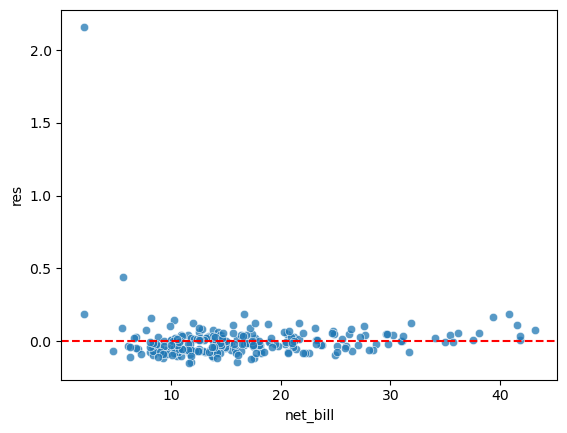

In [7]:

reg = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

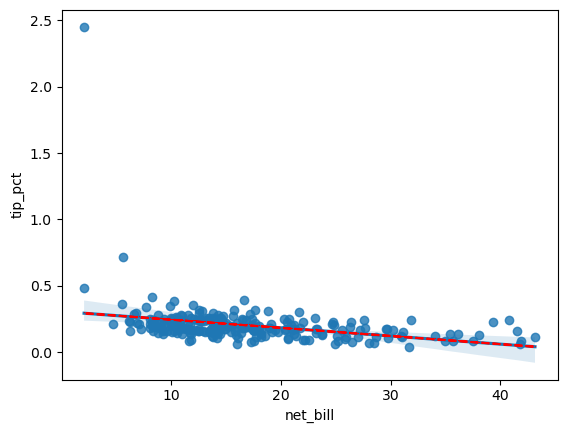

In [9]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.62e-13
Time:                        15:05:45   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

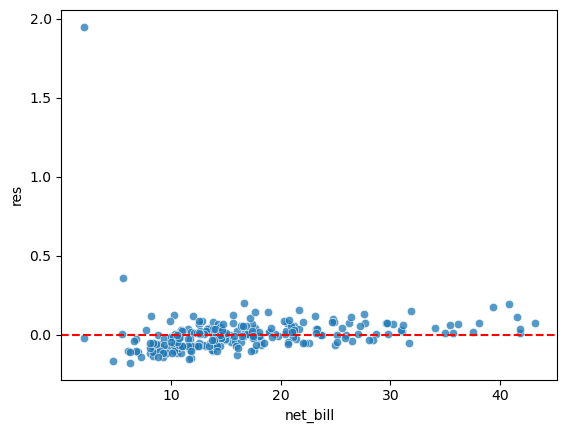

In [11]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

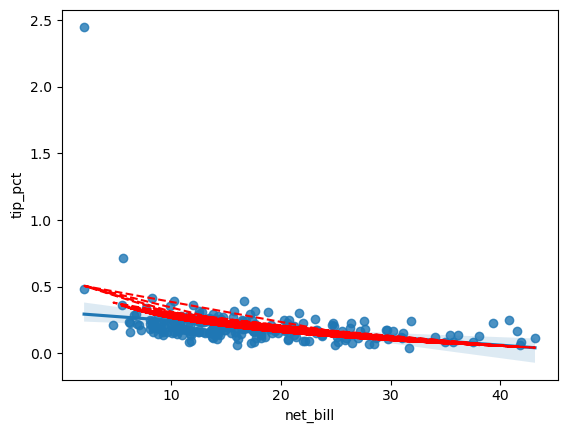

In [12]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           1.06e-09
Time:                        15:06:53   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

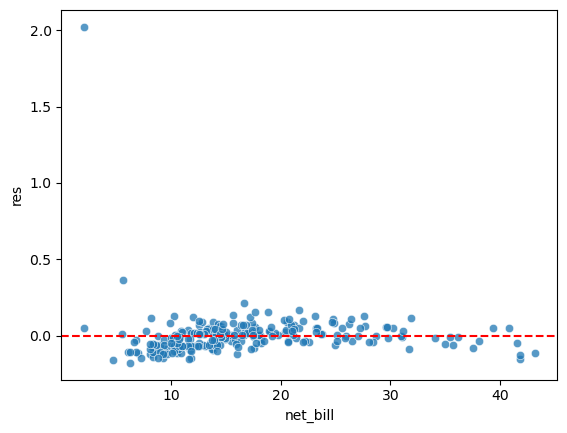

In [13]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

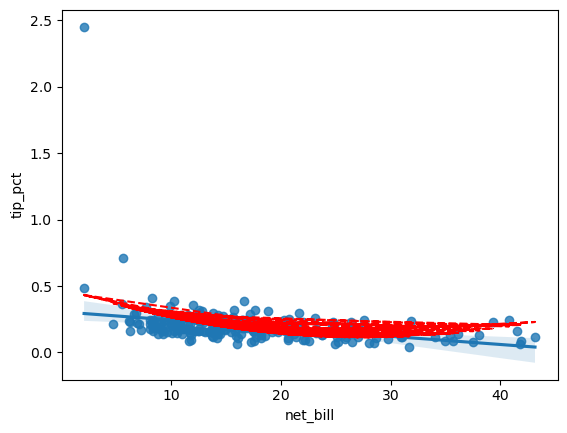

In [14]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           8.27e-16
Time:                        15:07:59   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

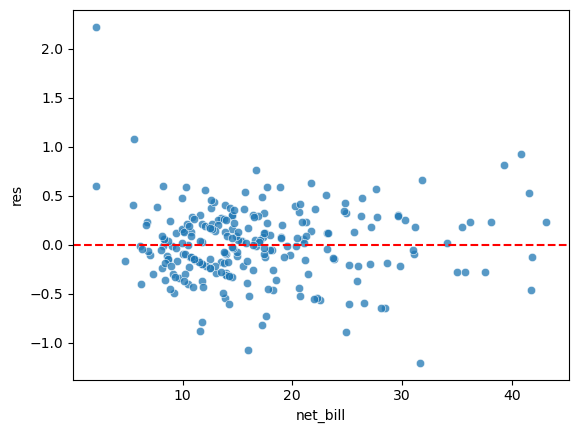

In [16]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In [17]:
tips['pred_tip_pct'] = np.exp(reg.fittedvalues)

print('R-squared:', 
      tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2
     )

R-squared: 0.11440988592529779


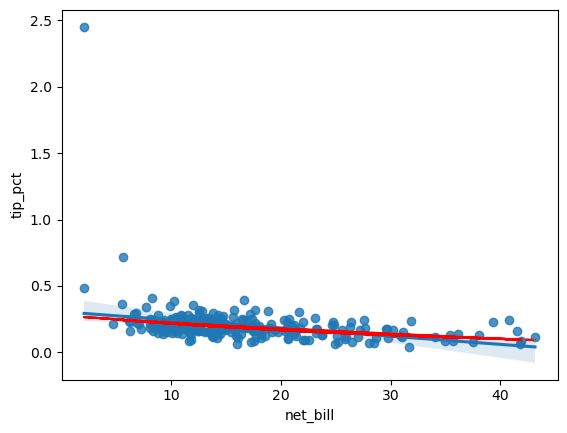

In [18]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r,--')

plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           5.20e-20
Time:                        15:09:33   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

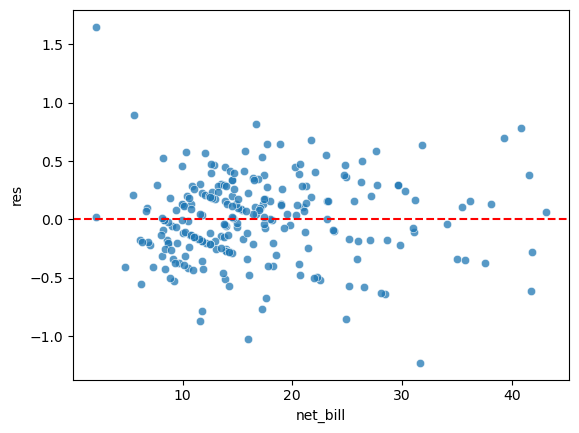

In [20]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75)
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

In [21]:
tips['pred_tip_pct'] = np.exp(reg.fittedvalues)

print('R-squared:',
      tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2
     )

R-squared: 0.30894874740322265


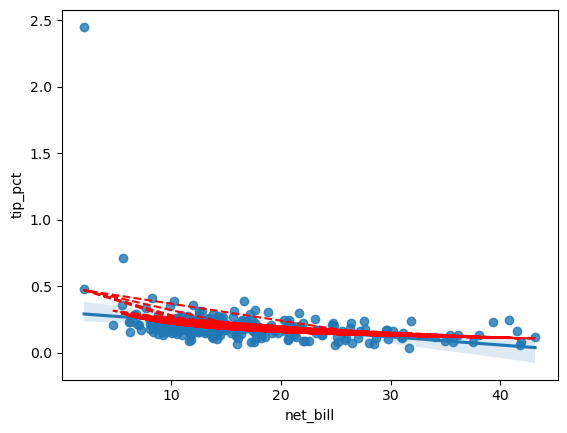

In [22]:
sns.regplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r,--')

plt.show()

###  6. qual modelo resultou no melhor ajuste?

O último modelo no log de tip_pct em função do log de net_bill que obteve um coeficiente de determinação (𝑅2) de 31%.